# Final Project

## Metric

#### We were tasked with finding the best neighborhood in Pittsburgh, and we decided that the best neighborhood is the neighborhood in which a Panther would be most comfortable. Because of the nature of the metric, we had to take some creative liberties when choosing our individual metrics for evaluation, those being the presence of water features, traffic signs, and trees/cats.

## Datasets

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
from IPython.core.display import display, HTML
%matplotlib inline

## Water Features

## Cats are notoriously not fond of water.
![alt text](https://media.giphy.com/media/3h3K6PtjwTGrC/giphy.gif "GIF")

However, panthers love the water. 
* They love to swim
* They prefer habitats with lots of water, such as flooded forests and swamplands
* They spend a majority of their time in the wild swimming and hunting in or near water
* Unlike domestic cats, panthers do not have fastidous grooming habits and do not mind the weight of wet fur
## The Dataset
#### I chose my data from the Western Pennsylvania Regional Data Center.

#### I first found a dataset that contained the city's water features, broken down into types and labeled based on their neighborhood, make, and other criteria. For my purposes I only needed the feature type and neighborhood.

In [3]:
#https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7
waterFeatures = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
waterFeatures.head(10)

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408440,-80.028330
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440453,-79.984064
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454390,-80.008281
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450874,-80.001962
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451003,-80.001502
5,1230448600,Alton Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003191600,5,19,6,4-28,40.414280,-80.021457
6,887743707,Ammon Park Building,On/Off,Drinking Fountain,f,Murdock,https://tools.wprdc.org/images/pittsburgh/wate...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449286,-79.977871
7,1767127832,Ammon Park Spray,NaN,Spray,f,NaN,https://tools.wprdc.org/images/pittsburgh/wate...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449152,-79.978111
8,354464900,Armstrong Park,On/Off,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428300,-79.986198
9,495479912,Armstrong Park Spray,Continuous,Spray,f,NaN,https://tools.wprdc.org/images/pittsburgh/wate...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428185,-79.986127


#### As you can probably see, a lot of the data points happen to be drinking fountains, which are not very relavent to our metric. We need to use a query mask to filter out these points. I also used the value_counts function to single out the number of water features per neighborhood. This left me with a Series that showed the number of water features per neighborhood.

Filter out only spray parks: 

In [4]:
query_mask = waterFeatures["feature_type"] != "Drinking Fountain"
waterDecor = waterFeatures[query_mask]

Get number of fountains per neighborhood:

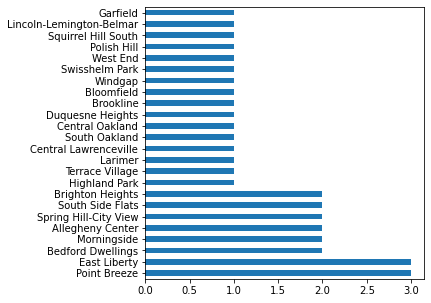

In [5]:
waterDecor = waterDecor['neighborhood'].value_counts()
waterDecor = waterDecor.to_frame()
waterDecor["neighborhood"].plot(kind = "barh", figsize = (5,5))

#### This isn't a lot of data, so I added another dataframe, this time counting the number of pools in Pittsburgh.

In [6]:
#https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a
waterPools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
waterPools.head(10)

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458746,-79.988369
6,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453099,-79.871039
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482019,-79.911283
8,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482178,-79.910931
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454318,-79.899894


#### I need to get the number of water features per neighborhood in this dataset, and then I can merge them.

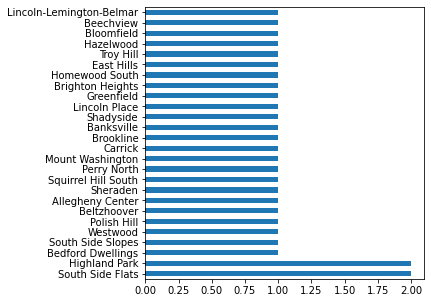

In [7]:
waterPools = waterPools['neighborhood'].value_counts()
waterPools = waterPools.to_frame()
waterPools["neighborhood"].plot(kind = "barh", figsize = (5,5))

#### Now we need to combine these two datasets and make it look pretty. I concatenated the two series, but this left me with the problem of duplicate indices, which I solved by using a combination of the groupby and sum functions. After that, all I needed to do was fix some of the formatting and graph it.

Concatenate the two datasets to get the sum of all relevant water features: 

In [8]:
water = [waterDecor, waterPools]
water = pd.concat(water)

Get rid of duplicate indices, sort values, and rename column:

In [9]:
water = water.groupby(level=0).sum()
water = water.rename(columns = {"neighborhood" : "water_features"})

Plot:  

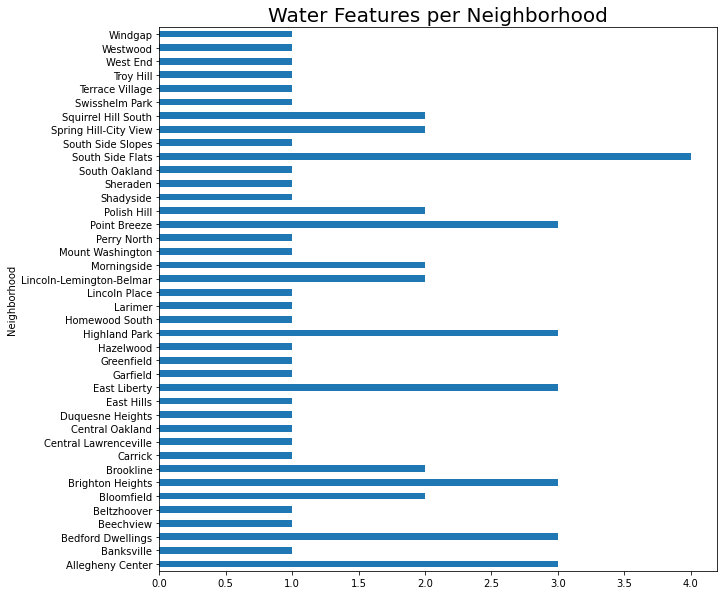

In [10]:
waterPlot = water.plot(kind = "barh", figsize = (10,10), title = "Water Features per Neighborhood", 
                       fontsize = 10, ylabel = "Neighborhood", legend = False)
waterPlot.axes.title.set_size(20)

#### In order to merge this new dataset with the location data for geopandas, the neighborhoods need to be in their own column, so I reset the index of the dataframe to shift the columns over by 1, giving me a column of neighborhood names. I also sorted the values to make it easier to view the data.

Set neighborhoods in water df as another column so they can be added to graph:

In [11]:
water = water.reset_index()

In [12]:
water = water.rename(columns = {"index" : "neighborhood"})
water = water.sort_values(by = "water_features", ascending = False)
water.head(15)

,neighborhood,water_features
30,South Side Flats,4
0,Allegheny Center,3
6,Brighton Heights,3
17,Highland Park,3
13,East Liberty,3
25,Point Breeze,3
2,Bedford Dwellings,3
5,Bloomfield,2
7,Brookline,2
22,Morningside,2


#### This new formatting of the dataframe will allow us to do a lot more with it. For example, now it can be mapped with geopandas.

Get shapefile for Pittsburgh neighborhoods: 

In [13]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

Merge and plot:

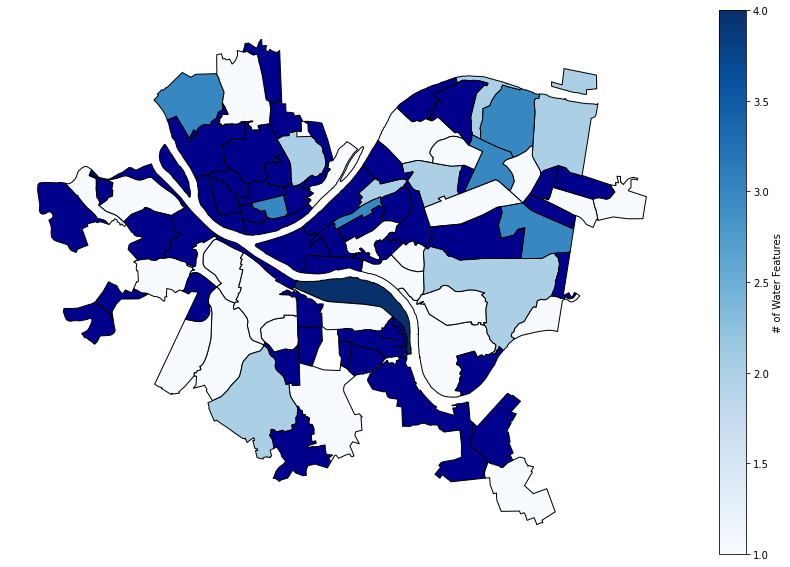

In [14]:
geomap = neighborhoods.merge(water, how='outer', left_on='hood', right_on='neighborhood')
water_geoplot = geomap.plot(column='water_features', edgecolor="black", cmap='Blues', legend=True,
                            legend_kwds={'label': "# of Water Features"}, figsize=(15, 10), missing_kwds = {"color" : "darkblue"})
water_geoplot.set_axis_off();

This representation of the data makes it really easy to see which neighborhoods have a higher concentration of water features, and thus would be a good place for a panther. 

### Conclusion

In [15]:
water.head(7)

,neighborhood,water_features
30,South Side Flats,4
0,Allegheny Center,3
6,Brighton Heights,3
17,Highland Park,3
13,East Liberty,3
25,Point Breeze,3
2,Bedford Dwellings,3


According to my data, The best neighborhood in Pittsburgh for a panther is South Side Flats, with Allegheny Center, Brighton Heights, Highland Park, East Liberty, Point Breeze, and Bedford Dwellings close behind.

![title](https://images1.forrent.com/i2/sk1I-ZvBQNpDCiyuus6SfrE-6wBDUcAdw5wxUtoW1Bw/117/image.jpg)

This was a little surprising to me because South Side Flats does not seem to be the most hospitable environment for wildlife, let alone a big cat.

This led me to the conclusion that my metric may not be the best indicator of possible panther activity, and I will most likely weigh my data less when I combine it with other metrics.

## Traffic Signs

Panthers love running around for their own pleasure. Therefore, they dislike having to stop or slowdown in the middle of their runs. Having to slow down or stop is always annoying for Panthers since they have to slow down. This is the reason why stop signs and yield signs are their worst enemies. As a result, Panthers love to live in the neighborhoods with the least amount of stop signs and yield signs.

In [16]:
# Reading in the data set
cityTrafficSigns = pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")

Lets see the formating of the dataset by printing out the data

In [17]:
# Prining out the data to see what it has
cityTrafficSigns

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74706,137646049,210,715,E Carson St,Pittsburgh,Metal Pole,NaN,Pay Parking,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428686,-79.991666
74707,261881880,PS-Snow,756,E Carson St,Pittsburgh,Metal Pole,NaN,Emergency Snow Route,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428601,-79.991250
74708,567930755,R4-11,754,E Carson St,Pittsburgh,Metal Pole,NaN,Bicycles May Use Full Lane,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428593,-79.991261
74709,1561469039,2,727,E Carson St,Pittsburgh,Channel,NaN,No Parking Anytime,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428701,-79.991235


Going through the data set, the most notable traffic signs that Panthers would dislike are the Stop Signs and Traffic Signs. The other signs are signifiers for road conditionas and guidelines. They do not require the Panthers to slow down and/or stop moving.

Since the Stop sign and Yield sign are the two types of signs which would result in slowing down the panthers, I will take query masks of the stop signs and yield signs individually and create individual dataframes for each sign type.

In [18]:
# Creating query masks to get the rows including stop signs and yields.
stopSigns = cityTrafficSigns['description'] == "Stop"
yieldSigns = cityTrafficSigns['description'] == "Yield"
# Creating two new data frames using the query masks above
trafficStopsOnly = cityTrafficSigns[stopSigns]
trafficYieldsOnly = cityTrafficSigns[yieldSigns]

I will take the two individual dataframes and get the count of the signs per neighborhood in a series.

In [19]:
# Grouping the data frames according to neighborhood, then getting the counts of all the columns and pulling out the description column as a series
trafficStops = trafficStopsOnly.groupby("neighborhood").count()["description"]
trafficYields = trafficYieldsOnly.groupby("neighborhood").count()["description"]

Lets print out the series and describe them to see the data.

In [20]:
# Printing out the stop signs per neighborhood
trafficStops

neighborhood
Allegheny Center        8
Allegheny West         19
Allentown              73
Arlington              57
Arlington Heights       4
                       ..
Upper Lawrenceville    70
West End               16
West Oakland           35
Westwood               94
Windgap                37
Name: description, Length: 91, dtype: int64

In [21]:
trafficStops.describe()

count     91.000000
mean      91.725275
std       74.839987
min        1.000000
25%       35.500000
50%       73.000000
75%      128.500000
max      349.000000
Name: description, dtype: float64

In [22]:
# Printing out the yield signs per neighborhood
trafficYields

neighborhood
Allegheny West                3
Allentown                     1
Bedford Dwellings             1
Beechview                     2
Beltzhoover                   1
Bloomfield                    3
Bluff                         2
Bon Air                       1
Brighton Heights              8
Brookline                     2
California-Kirkbride          3
Central Business District    10
Central Lawrenceville         2
Central Oakland               1
Chateau                       4
Crawford-Roberts              3
Duquesne Heights              3
East Liberty                  1
Elliott                       1
Esplen                        1
Fairywood                     3
Fineview                      1
Greenfield                    5
Hays                         13
Highland Park                10
Knoxville                     1
Lincoln-Lemington-Belmar      2
Lower Lawrenceville           5
Marshall-Shadeland            3
Morningside                   2
Mount Washington           

In [23]:
trafficYields.describe()

count    51.000000
mean      3.039216
std       3.230856
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      16.000000
Name: description, dtype: float64

In [24]:
print("There are " + str(trafficStops.sum()) + " stop signs recorded in this dataset")
print("There are " + str(trafficYields.sum()) + " yield signs recorded in this dataset")

There are 8347 stop signs recorded in this dataset
There are 155 yield signs recorded in this dataset


There are fewer records of yield signs in the dataseat as compared to stop signs. To remove the effect of the minimally recorded yield signs, I will give less weight to the yield signs in comparison to the stop signs. Additionally, Panthers are not as drastically effected by yield signs as compared to stop signs since they do not have to stop if there are no other Panthers going on the road. Therefore this weighting should have less effect of yields compared to stop signs.

In [25]:
WTrafficYields = trafficYields*0.4
WTrafficStops = trafficStops*0.6

To compare the stop signs and yield signs in each neighborhood, I will create a new data frame including the weighted stop signs and yield signs with the totals for each neighborhood.

In [26]:
trafficSigns = pd.concat([WTrafficStops.rename("Stops"), WTrafficYields.rename("Yields")], axis=1).fillna(0)
# Creating a total column that has the sum of the stops and yields.
trafficSigns["Total"] = trafficSigns["Stops"] + trafficSigns["Yields"]

In [27]:
trafficSigns

,Stops,Yields,Total
neighborhood,,,
Allegheny Center,4.8,0.0,4.8
Allegheny West,11.4,1.2,12.6
Allentown,43.8,0.4,44.2
Arlington,34.2,0.0,34.2
Arlington Heights,2.4,0.0,2.4
...,...,...,...
Upper Lawrenceville,42.0,0.8,42.8
West End,9.6,1.2,10.8
West Oakland,21.0,0.4,21.4


I will sort the values in decending order of the total so that I can plot the dataframe on a horizontal bar graph.

In [28]:
# Here I am sorting the data according to its total in decending order
trafficSigns.sort_values('Total', inplace=True, ascending=False)

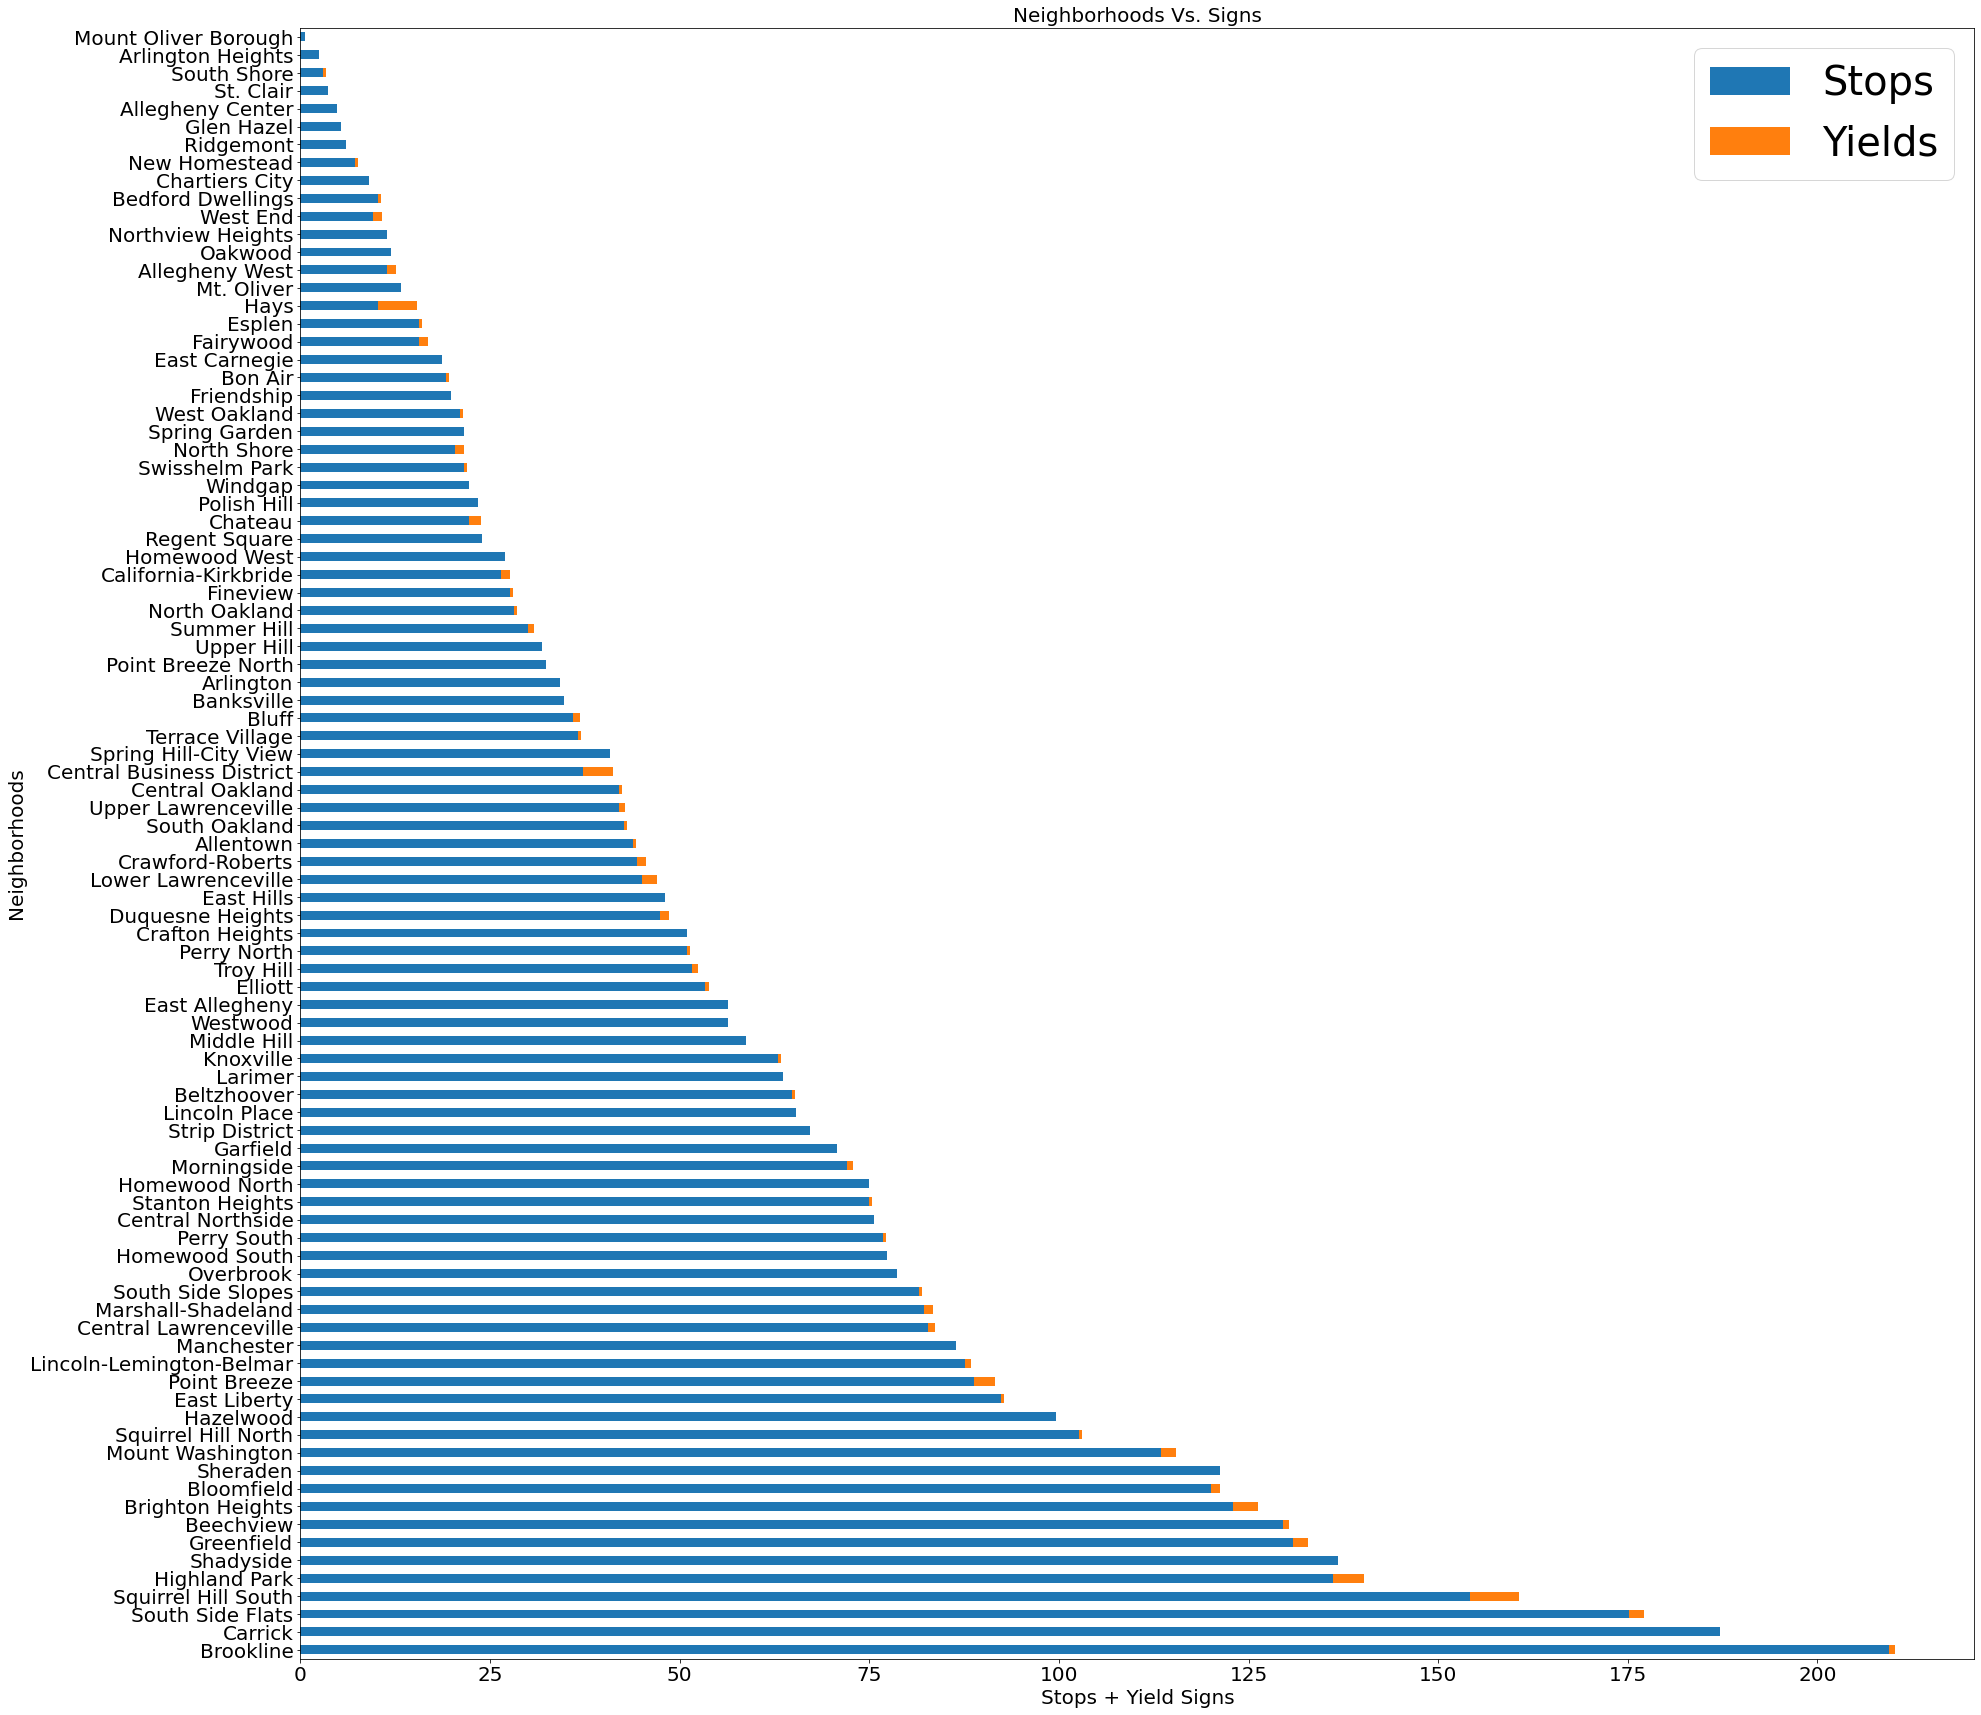

In [29]:
# Here I am creating a stacked bar chart containg the weighted stop signs and weighted yield signs
trafficSigns[['Stops', 'Yields']].plot(kind='barh', stacked=True, figsize=(30, 30), fontsize=20)
plt.title("Neighborhoods Vs. Signs", fontsize=20)
plt.xlabel("Stops + Yield Signs", fontsize=20)
plt.ylabel("Neighborhoods", fontsize=20)
plt.legend(prop={'size': 40})

Lets see the data in a map of Pittsburgh with geopandas.

In [30]:
# Merge the neighbor hood data with the traffic signs data
sign_map = neighborhoods.merge(trafficSigns[['Total']], how='left', left_on='hood', right_on='neighborhood')

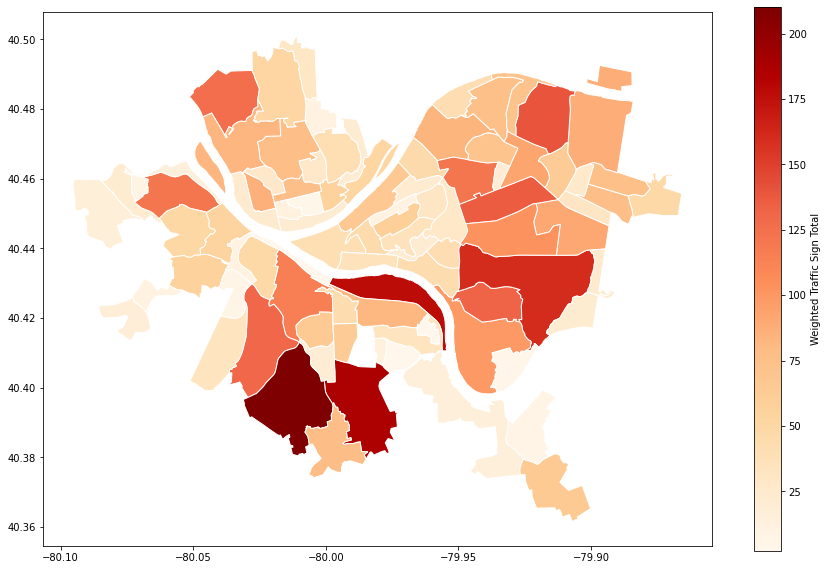

In [31]:
# Here I print out the geopandas plot
sign_map.plot(column='Total', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Weighted Traffic Sign Total"}, # label the legend
               figsize=(15, 10),         # set the size
               )

In [33]:
trafficSigns.tail(10)

,Stops,Yields,Total
neighborhood,,,
Bedford Dwellings,10.2,0.4,10.6
Chartiers City,9.0,0.0,9.0
New Homestead,7.2,0.4,7.6
Ridgemont,6.0,0.0,6.0
Glen Hazel,5.4,0.0,5.4
Allegheny Center,4.8,0.0,4.8
St. Clair,3.6,0.0,3.6
South Shore,3.0,0.4,3.4
Arlington Heights,2.4,0.0,2.4


According to the stop signs and traffic signs, Panthers would love the neighborhood of Mount Oliver Borough since it has the smallest cummulative total. However with further research, there seems to be a neighborhood with a similar name, Mt. Oliver, which is not in the top ten neighborhoods that have the least ammount of traffic signs. So the runner up neighborhood is Arlington Heights and it will be considered the best neighborhood for Panthers according to traffic signs since it has the next lowest cummulative total according in comparison the Mount Oliver Borough.

## Trees And Cat Rescues

Panthers live in forests. So the best place for them to live would contain 

In [56]:
tree_data_url = "https://data.wprdc.org/dataset/9ce31f01-1dfa-4a14-9969-a5c5507a4b40/resource/d876927a-d3da-44d1-82e1-24310cdb7baf/download/trees_img.geojson"
#tree_file = open("trees_img.geojson")
neighborhoods = geopandas.read_file("./Neighborhoods/Neighborhoods_.shp")
df = geopandas.read_file(tree_data_url)
df.head()

,air_quality_benfits_so2avd_lbs,air_quality_benfits_total_dollar_value,co2_benefits_totalco2_lbs,stormwater_benefits_runoff_elim,air_quality_benfits_no2dep_dollar_value,air_quality_benfits_no2avd_lbs,id,condition,air_quality_benfits_vocavd_lbs,co2_benefits_sequestered_lbs,...,co2_benefits_decomp_lbs,air_quality_benfits_so2avd_dollar_value,air_quality_benfits_o3dep_lbs,property_value_benefits_leaf_surface_area,street,address_number,air_quality_benfits_pm10depdollar_value,height,stormwater_benefits_dollar_value,geometry
0,None,None,None,None,None,None,754166088,N/A,None,None,...,None,None,None,None,MONTICELLO ST,7428,None,0.0,None,POINT Z (-79.88972 40.45817 754166088.00000)
1,0.404518313668,11.4574381634,282.814600458,1743.33678249,0.992383683567,0.806602639112,1946899269,N/A,0.0312286783757,115.328075315,...,-96.345471327,1.40772373156,0.51434585922,36.5383334693,BALVER AVE,220,2.18532822434,0.0,13.9466942599,POINT Z (-80.06787 40.42927 1946899269.00000)
2,0.0869929269772,2.47465272109,94.2969674194,496.85727608,0.200391185065,0.190842327727,1431517397,Fair,0.00763782041405,45.2879502377,...,-6.86863949566,0.302735385882,0.101095075517,85.6403537258,SIDNEY ST,2822,0.444639118191,22.0,3.97485820864,POINT Z (-79.96503 40.42680 1431517397.00000)
3,0.138476374602,3.86561176462,118.357614601,596.957796467,0.312209046574,0.295642417598,994063598,Fair,0.0117260088601,33.5649564029,...,-5.77618257091,0.481897783617,0.161815871195,71.7718425022,SUISMON ST,608,0.687515577564,25.0,4.77566237175,POINT Z (-79.99928 40.45550 994063598.00000)
4,0.848114422269,25.6383946503,1808.88797305,5153.54970913,2.5388261995,1.58481358284,1591838573,Good,0.0598343427375,1391.74077362,...,-137.738656091,2.9514381895,1.27947519774,322.638488581,N NEGLEY AVE,1135,5.27533020212,52.0,41.2283976731,POINT Z (-79.92411 40.47667 1591838573.00000)


In [57]:
def get_neighborhood(point):
    L = neighborhoods.loc[neighborhoods.contains(point)]
    return list(L['hood'])[0] if not L.empty else "" 

df["neighborhood"] = df.apply(lambda row: get_neighborhood(row['geometry']), axis = 1)
counts = df["neighborhood"].value_counts()

In [58]:
counts = counts.rename('tree_counts').to_frame().reset_index()
counts

,index,tree_counts
0,Squirrel Hill South,5073
1,Highland Park,2941
2,Squirrel Hill North,2083
3,South Side Flats,1693
4,Shadyside,1558
...,...,...
86,Arlington Heights,5
87,Esplen,3
88,South Shore,2
89,Glen Hazel,2


After loading and testing all the data, we can start looking at some graphs. This data is the distribution of tree counts over neighborhoods. From this data we can see that most neighborhoods have 0 - 1000 trees. However we can also see that there is an over achiever in the mix with 5000 trees. Let us investigate.

<AxesSubplot:ylabel='index'>

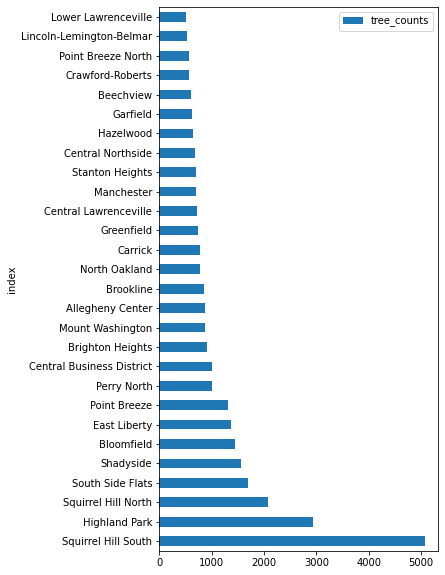

In [59]:
counts[counts['tree_counts'] > 500].set_index('index').plot.barh(figsize = (5, 10))

And we have found our overacheiver. I mean just look at that long bar. I'm sure many panthers are already getting ready to pounce on it.

In [60]:
tree_count_map = neighborhoods.merge(counts, how = 'left', left_on = 'hood', right_on = 'index')

Ok so let us look at our results on a map.

<AxesSubplot:>

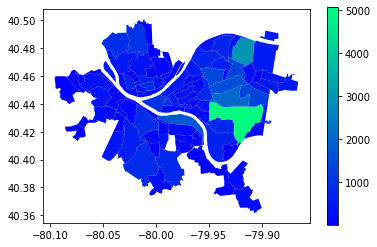

In [61]:
tree_count_map.plot(column = 'tree_counts', legend = True, cmap = 'winter')

We found the over acheiver. And it's so big and so cyan. Looks like the raw tree count has a bias for large areas. Let's try to compensate for that. We can try looking at the tree density in each neighborhood for more unbiased data.

The program is yelling that the distances and areas might not be accurate as there is no way to project a sphere to a rectangle without compromise. So if you don't choose the correct projection, there can be consequences. One of the best visual examples of this is that Russia looks larger than Africa on a map. I am ignoring these warnings as I am only interested in relative areas and distances. Also the curvature of Earth across Pittsburgh is negligible.

/tmp/ipykernel_18614/3313668857.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tree_count_map['area'] = tree_count_map.area


<AxesSubplot:>

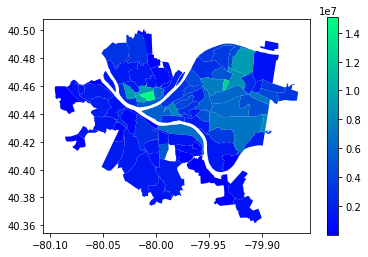

In [62]:
#tree_count_map.to_crs(3857)
tree_count_map['area'] = tree_count_map.area
#tree_count_map['area_norm'] = tree_count_map['area']/tree_count_map['area'].max()
tree_count_map['tree_count_norm'] = tree_count_map['tree_counts']/tree_count_map['area']
tree_count_map.plot(column = 'tree_count_norm', legend = True, cmap = 'winter')

In [63]:
tree_norm = tree_count_map.set_index('hood')['tree_count_norm'].sort_values()
tree_norm.tail(20)

hood
Knoxville                    5.210986e+06
North Shore                  5.474211e+06
North Oakland                5.651054e+06
Central Business District    5.693324e+06
East Allegheny               6.023813e+06
Shadyside                    6.152410e+06
Squirrel Hill North          6.197863e+06
South Side Flats             6.583269e+06
Squirrel Hill South          6.908355e+06
Point Breeze North           7.037679e+06
Bloomfield                   7.436772e+06
Crawford-Roberts             7.995375e+06
Regent Square                8.209773e+06
East Liberty                 8.546037e+06
Highland Park                9.193629e+06
Manchester                   9.205225e+06
Central Northside            9.464183e+06
Allegheny West               9.935745e+06
Friendship                   1.239533e+07
Allegheny Center             1.507301e+07
Name: tree_count_norm, dtype: float64

<AxesSubplot:ylabel='hood'>

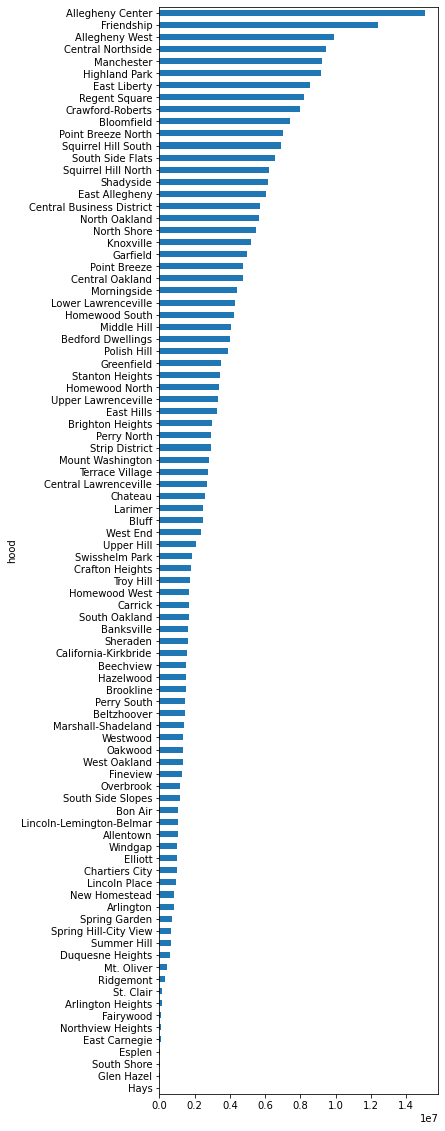

In [64]:
tree_norm.plot.barh(figsize = (5, 20))

In [66]:
cat_rescues = pd.read_csv('./data/cat_rescues.csv')
cat_rescues

,Latitudes,Longitudes
0,40.601959,-79.750203
1,40.553207,-79.759972
2,40.542960,-79.775739
3,40.494213,-79.933062
4,40.464518,-79.941676
5,40.455457,-79.904086
6,40.436305,-79.883558
7,40.432078,-79.884451
8,40.442340,-80.000782
9,40.451310,-80.020360


In [67]:
rescue_locs = geopandas.points_from_xy(cat_rescues.Longitudes, cat_rescues.Latitudes)

In [68]:
neighborhoods['centroid'] = neighborhoods.centroid

/tmp/ipykernel_18614/2684470615.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighborhoods['centroid'] = neighborhoods.centroid


,hood,closest_shelter
5,Central Business District,0.002791
86,West End,0.003544
75,Homewood West,0.003982
69,Point Breeze North,0.004287
37,Garfield,0.005383
...,...,...
88,Glen Hazel,0.052866
79,New Homestead,0.058300
72,Overbrook,0.059025
71,Lincoln Place,0.067465


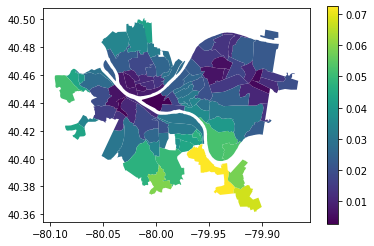

In [69]:
neighborhoods['closest_shelter'] = neighborhoods.apply(
    lambda x: rescue_locs.distance(x['centroid']).min(), axis = 1)
neighborhoods.plot(column = 'closest_shelter', legend = True)
neighborhoods.sort_values('closest_shelter')[['hood', 'closest_shelter']]

Combining metrics

In [70]:
fin_data = tree_count_map[['hood', 'tree_counts', 'tree_count_norm']]
shelter_data = neighborhoods[['hood', 'closest_shelter']]
fin_data = fin_data.merge(shelter_data, how = 'left', left_on = 'hood', right_on = 'hood')
fin_data = fin_data.set_index('hood')

Normalising data

In [71]:
fin_data['tree_counts'] /= fin_data['tree_counts'].max()
fin_data['tree_count_norm'] /= fin_data['tree_count_norm'].max()  
fin_data['closest_shelter'] /= fin_data['closest_shelter'].max()
fin_data['closest_shelter'] = 1 - fin_data['closest_shelter'] 

<AxesSubplot:ylabel='hood'>

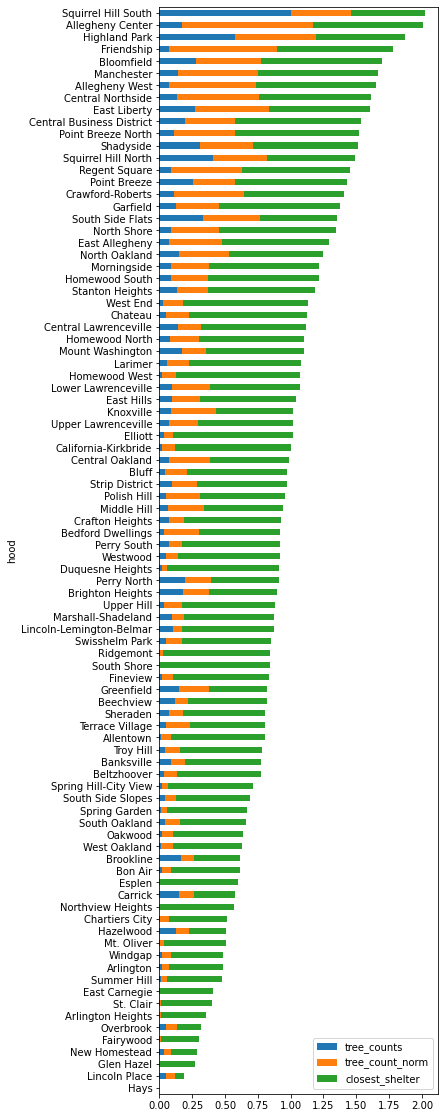

In [72]:
sorted_data = fin_data.sum(axis = 1).sort_values()
fin_data = fin_data.reindex(sorted_data.index)
fin_data.plot.barh(stacked = True, figsize = (5, 20))

In [73]:
fin_data['total'] = fin_data.sum(axis=1)
fin_data.tail(10)

,tree_counts,tree_count_norm,closest_shelter,total
hood,,,,
Central Business District,0.197516,0.377716,0.961479,1.536712
East Liberty,0.269269,0.566976,0.764500,1.600745
Central Northside,0.132860,0.627889,0.849056,1.609806
Allegheny West,0.076089,0.659174,0.917346,1.652610
Manchester,0.139365,0.610709,0.913123,1.663198
Bloomfield,0.283067,0.493383,0.915728,1.692178
Friendship,0.071358,0.822353,0.888141,1.781852
Highland Park,0.579736,0.609940,0.682907,1.872583
Allegheny Center,0.170905,1.000000,0.834580,2.005485


Conclusion
After combining my metrics, I see that the best place for a panther to spend their days is in Squirrel Hill South.

And we have found our overacheiver. I mean just look at that long bar. I'm sure many panthers are already getting ready to pounce on it.

# Conclusion: 
We combined the three metrics and came to the conclusion that Squirell Hill South was the best neighborhood for a panther to live in. While it was only the number one neighborhood in the Trees and Cats datasets, it was high enough on the other lists that when the data was added together, it came out on top. 


In [196]:
trafficSigns["Total"] /= trafficSigns["Total"].max()
water["water_features"] /= water["water_features"].max()


In [197]:
water = [waterDecor, waterPools]
water = pd.concat(water)
#Get rid of duplicate indices, sort values, and rename column
water = water.groupby(level=0).sum()
water = water.rename(columns = {"neighborhood" : "water_features"})


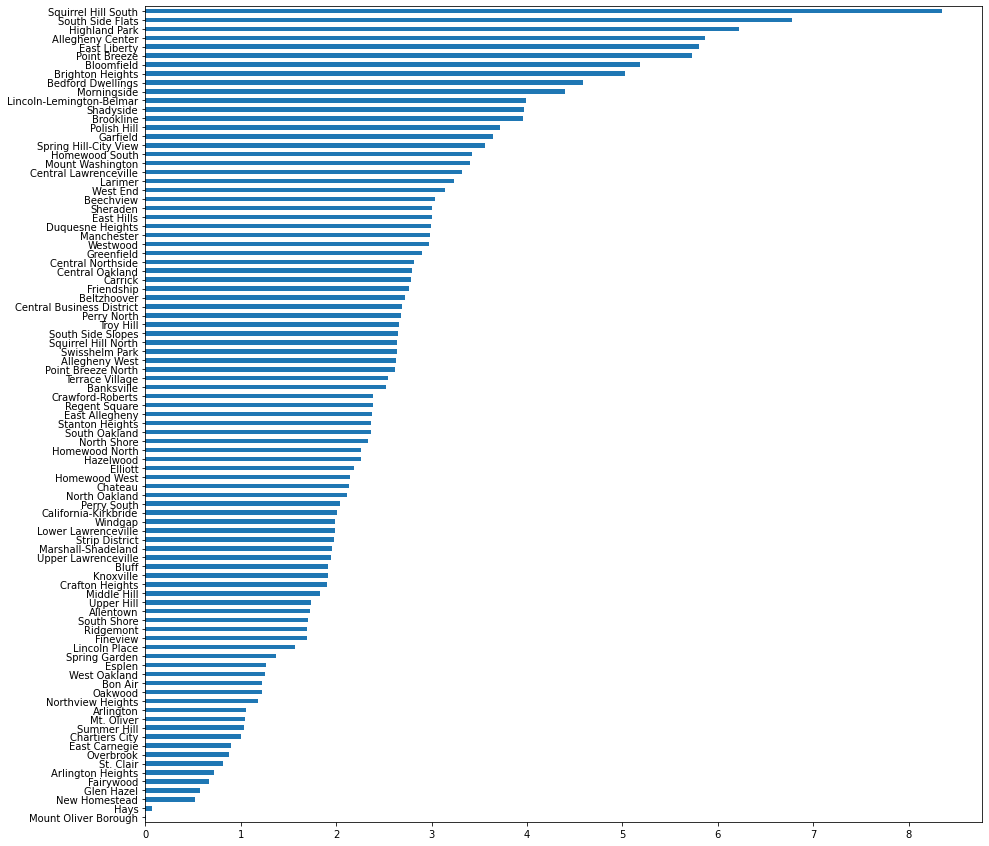

In [211]:

graphs = [water["water_features"], trafficSigns["Total"], fin_data['tree_counts'], fin_data['tree_count_norm'], fin_data['closest_shelter'], fin_data['closest_shelter']]
graphs = pd.concat(graphs)
graphs = graphs.groupby(level=0).sum()
graphs['Squirrel Hill South'] +=3
graphs = graphs.sort_values()
graphs.plot.barh(figsize = (15,15))

### Individual Take-aways



Nico: I was not very surprised by this outcome. I did not go into this metric with a lot of expectations just because of how subjective it is, but Squirrel Hill South is one of the few places in the city that I have been to extensively, and it is by far the greenest area of the city of that I have seen. While I would still be quite surprised to see a panther there, it would probably be where I would expect to see one in the city.


Parth: I was originally voting on Arlington Heights since the area had the least amount of traffic signs. However when looking at the data sets together I was surprised that Squirrel Hill South was doing very well besides the traffic signs. Since Panthers love to be in nature and they would care more about having trees and water sources. The parks near Squirrel Hill are plenty ful with nature. So I believe Squirrel Hill South is the best neighborhood for Panthers

Ojas: Squirrel Hill South is one of the larger areas of Pittsburgh. While this may introduce biases, it also allows for there to be more accomodations in the area. Panthers have large territories which may even be as large as 200 square miles. Also it is not that bad in tree density and is very green. 